(2, 2)


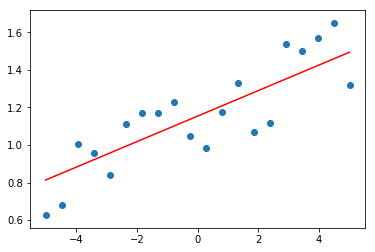

In [50]:
import numpy as np
from numpy import array
from numpy import matmul
from numpy.linalg import inv
from numpy.random import rand
from matplotlib import pyplot

# generate data on a line perturbed with some noise
noise_margin= 0.5
w = rand(2,1) # w[0] is random constant term (offset from origin), w[1] is random linear term (slope)
x  = np.linspace(-5,5,20)
y = w[0] + w[1]*x + noise_margin*rand(len(x))

# create the design matrix: the x data, and add a column of ones for the constant term
X = np.column_stack( [np.ones([len(x), 1]), x.reshape(-1, 1)] )

# These are the normal equations in matrix form: w = (X' X)^-1 X' y
#w_est = matmul(inv(matmul(X.transpose(),X)),X.transpose()).dot(y)

# For ridge regression, we add a regularizer:
# (reg_weight 0 reduces to the unregularized normal equation):
reg_weight = 0.01
w_est = matmul(inv(matmul(X.transpose(),X) + reg_weight*np.identity(2)),X.transpose()).dot(y)

# evaluate the x values in the fitted model to get estimated y values
y_est = w_est[0] + w[1]*x

# visualize the fitted model
pyplot.scatter(x, y)
pyplot.plot(x, y_est, color='red')
pyplot.show()